<a href="https://colab.research.google.com/github/SameerR007/ToyotaCorollaPricePrediction/blob/main/Toyota_Corola_Car_Price_Prediction_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toyota Corola Car Price Data analysis and modelling 

Pipeline of our Project \\
1. EDA (Exploratory Data Analysis ) \\
(i) Importing raw data and checking type of each column variable and dimension for data \\
(ii)Checking for missing observation in data and cheking for ouliers in data \\
(iii) Visualizing the data information with help of some descriptive statistics \\
(iv) Imputation of missing observation if found any 




#Predicting the price of Toyota Corolla on the basis of Few Independent variables.

#Acronym of variables

  #Age: Age in years
  #KM: Accumulated Kilometers on odometer
  #FuelType: Fuel Type (Petrol, Diesel, CNG)
  #HP: Horse Power
  #MetColor: Metallic Color (Yes=1, No=0)
  #Automatic: Automatic ( (Yes=1, No=0))
  #CC: Cylinder Volume in cubic centimeters
  #Doors: Number of doors
  #Weight: Weight in Kilograms
  #Price: Offer Price in EURO

#Importing libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Reading the data


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [ ]:
import io
dataset = pd.read_csv("/content/ToyotaCorolla.csv")
dataset


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015


In [ ]:
dataset.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [ ]:
dataset.shape


(1436, 10)

1.In the given dataset, there are 1436 rows and 10 columns.




2.We have one column as Dependent variable('Price') and other 9 columns as Independent variables('Age','KM','FuelType','HP','MetColor','Automatic','CC','Doors','Weight')
















In [ ]:
dataset.info() # Checking for the Data type of each column variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


1. Out of the given variables in the dataset,we have 9 'Integer' type variable and one 'object' type variable i.e. FuelType.


In [ ]:
dataset.isnull().sum() ## Checking for missing observation in the data 

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

1. No missing observation in the given dataset,thus we can easily proceed with analysis of our data.


#Outliers Check

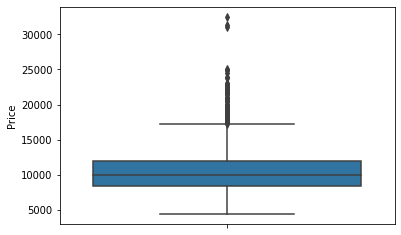

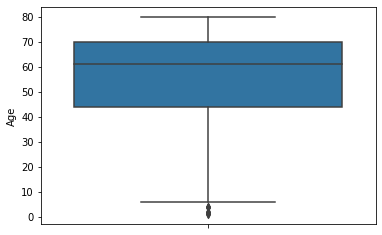

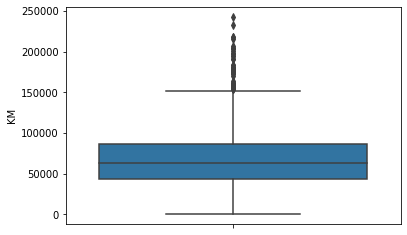

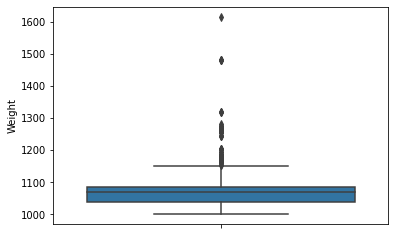

In [ ]:
continous_variable = [features for features in dataset.columns if (dataset[features].dtypes !='O'and len(np.unique(dataset[features]))>25)]
for outlier_check in continous_variable:
    sns.boxplot(y=dataset[outlier_check])
    plt.show()


1. There's a presence of outliers in all the Continuous variabes using Box Plot.


# Univariate analysis


In [ ]:
dataset.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


Descriptive analysis of different variables:-

1. Age: Age in years (Mean age of cars is 55 approximately, with minimum and maximum age as 1 and 80 years respectively.) 

2. KM: Accumulated Kilometers on odometer (Mean KM range of the given cars is 68533, with min and max range of one them is 1 and 243000 KM respectively.)

3. HP: Horse Power (Mean horsepower of cars is 101.50, with minimum and maximum HP is 69 and 192 respectively.) 

4. MetColor: Metallic Color(Yes=1, No=0) (67.479% of cars have metallic color.)

5. Automatic: Automatic (Yes=1, No=0) (Only 5.57% cars are automatic)

6. CC: Cylinder Volume in cubic centimeters (On an average CC of all the cars is 1536.82, with minimum and maximum CC as 187 and 2000 respectively.) 

7. Doors: Number of doors ( Average no. of doors in all the cars is 4 doors and also there's car with 2 doors and 5 doors.) 

8. Weight: Weight in Kilograms (Average weight of all the cars is 1072 Kg, with minimum and maximum weight as 52 and 1615 Kg respectively.) 

9. Price: Offer Price in EUROs (Average Price of all the cars is 10730 EURO, with minimum price and maximum price as 4350 and 32500 EURO respectively.)

# (i) Analysing Quantitaive Observations 

<Figure size 720x720 with 0 Axes>

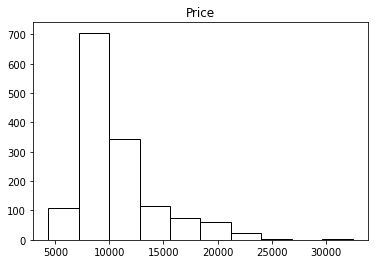

<Figure size 720x720 with 0 Axes>

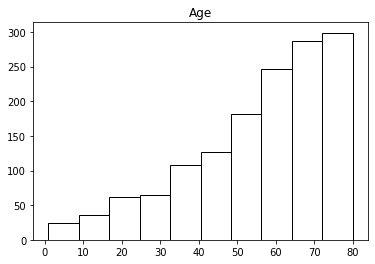

<Figure size 720x720 with 0 Axes>

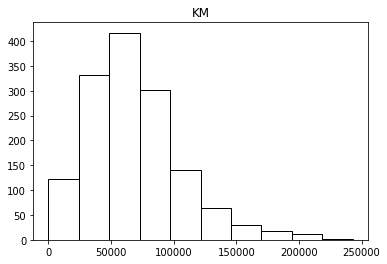

<Figure size 720x720 with 0 Axes>

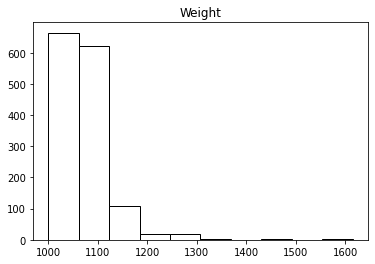

In [ ]:
#Histogram plot
for i in continous_variable: 
    plt.figure(figsize=(10,10))
    dataset.hist(column = i ,color = 'white', edgecolor = 'black', grid =False)
    plt.show()


1. 'Price' variable is positively skewed, representing that most of the cars lies in the range 5000-15000 EURO.
2. 'Age' of the given cars is negatively skewed data representing that people prefer cars with high durability.
3. 'KM' variable is postively skewed with most of the car lie in range (25000 to 100000)KM.
4. 'Weight' is Positively skewed, representing that people prefer more cars with less weight and vice-versa. 

## ii) Analyzing Qualitative Observations

#### Checking what are the different levels of the Qualitative variable in our data set 

In [ ]:
dataset.describe(include = np.object)
discrete_variables = [features for features in dataset.columns if len(np.unique(dataset[features]))<=25]
for i in discrete_variables:
  print("levels of "+i+" are-")
  print(dataset[i].unique())


levels of FuelType are-
['Diesel' 'Petrol' 'CNG']
levels of HP are-
[ 90 192  69 110  97  71 116  98  86  72 107  73]
levels of MetColor are-
[1 0]
levels of Automatic are-
[0 1]
levels of CC are-
[2000 1800 1900 1600 1400 1598 1995 1398 1300 1587 1975 1332]
levels of Doors are-
[3 5 4 2]


Total number of levels in each of the variables:
1. FuelType- 3
2. HP-12
3. MetColor-2
4. Automatic-2
5. CC-12
6. Doors-4



#### Plotting count plot for each qualitative variable to graphically see number of observation belonging to each levels 

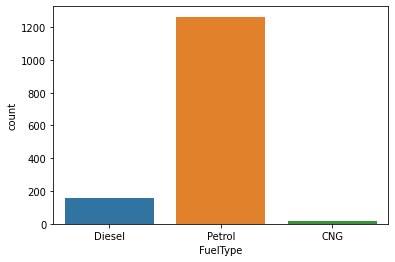

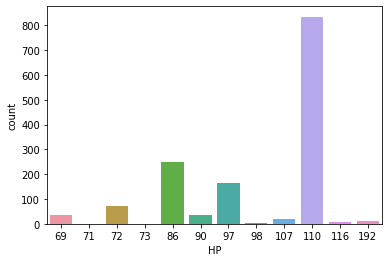

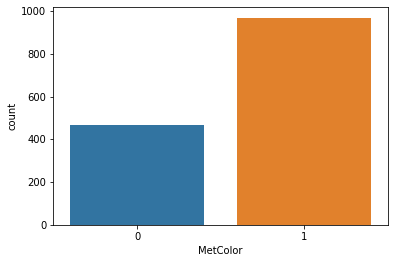

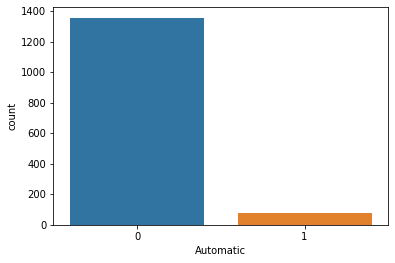

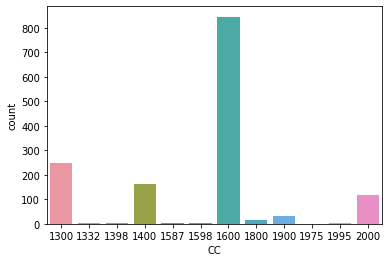

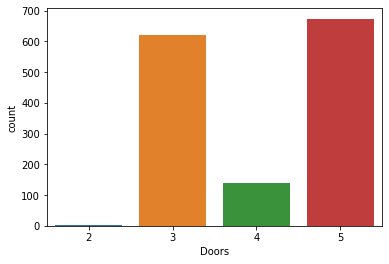

In [ ]:
for i in discrete_variables: 
    sns.countplot(x= i,data=dataset)
    plt.show()



#Bivariate Analysis

## i)Quantitative Observations

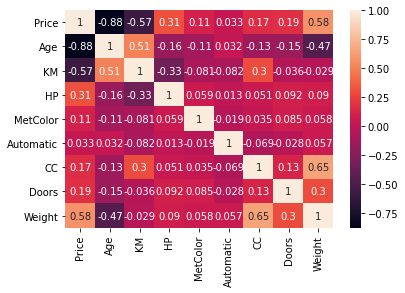

In [ ]:
sns.heatmap(dataset.corr(),annot=True)


From above we can see that price variable is highly negatively correlated with the age of car and also significantly negatively  correlated with the KM  of car and significantly positively correlated with the Weight of car 
** 
1. Correlation Between Price and age of the Cars is -0.88 i.e. High Negative Correlation.
2. Correlation Between Price and weight of the Cars is 0.58 i.e. Mild Positive Correlation.


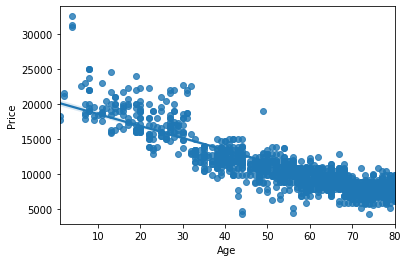

           Age    Price
Age    1.00000 -0.87659
Price -0.87659  1.00000
p-value = 0.000000


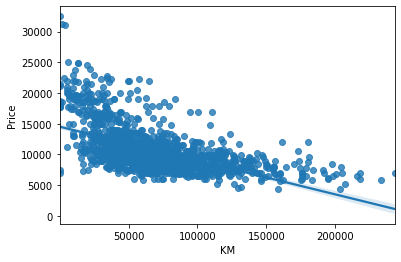

            KM    Price
KM     1.00000 -0.56996
Price -0.56996  1.00000
p-value = 0.000000


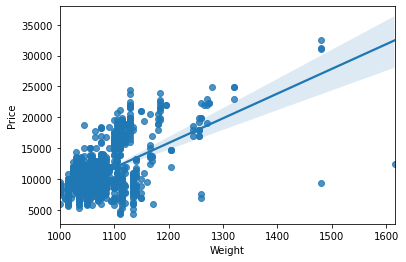

        Weight   Price
Weight  1.0000  0.5812
Price   0.5812  1.0000
p-value = 0.000000


In [ ]:
continous_variable.remove('Price')
for i in continous_variable:
    sns.regplot(y='Price', x= i, data =dataset)
    plt.show()
    print(dataset[[i,'Price']].corr().round(5))
    c,p = stats.pearsonr(dataset[i],dataset['Price'])
    print('p-value = %f' % p)

From above test and p -value we infer that there is significant correlation among Price V/s Age , weight , KM of car  as we got all p-value approximately equal to 0.




** After Performing Correlation coefficient test, we conclude that p-value between all the tested pairs is 0,thus we can say the Price and age,Price and Km,price and Weight of the cars is Significantly Correlated.


#ii)Qualitative Observations

t-statistic for independent t-test on Price wrt MetColor = 4.3981 and p-value = 0.0000
t-statistic for independent t-test on Price wrt Automatic = -1.2499 and p-value = 0.2146


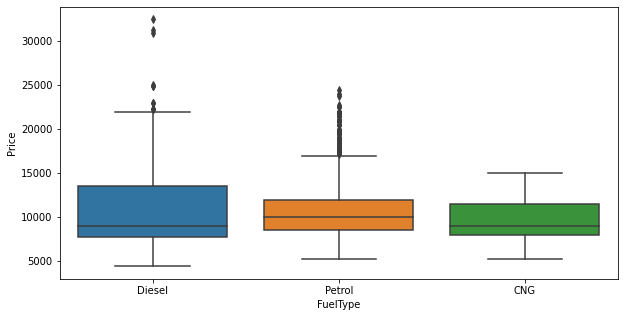

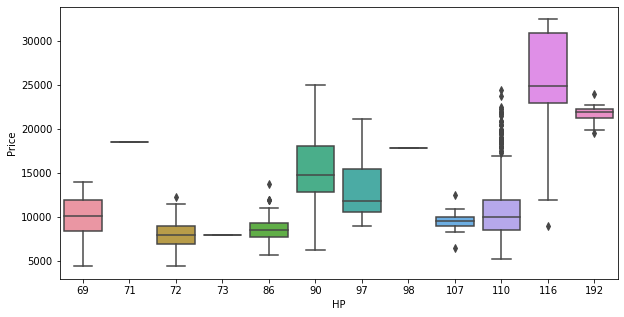

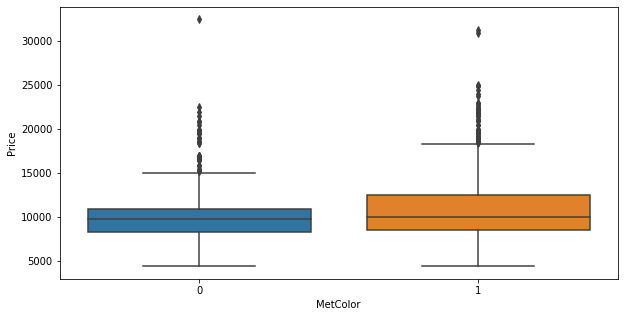

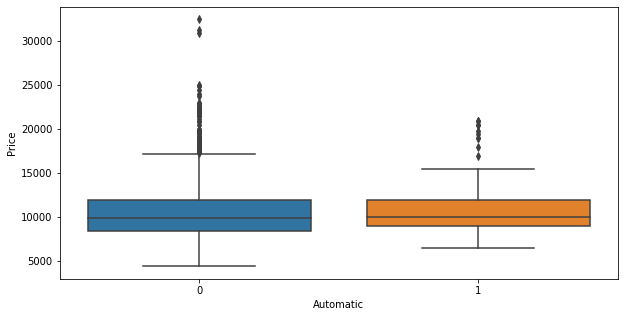

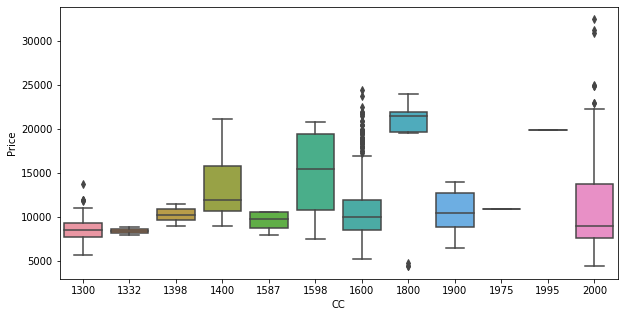

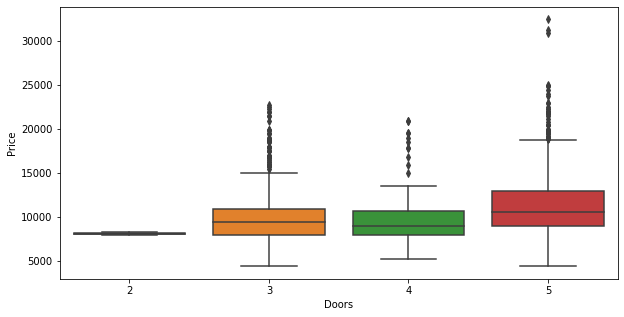

In [ ]:
for i in discrete_variables:
    plt.figure(figsize = (10,5))
    sns.boxplot(x = dataset[i],y =dataset['Price'])
    aa=dataset[i].unique()
    if(len(aa)==2):
        t,p = stats.ttest_ind(dataset['Price'][dataset[i]==aa[0]],dataset['Price'][dataset[i]==aa[1]], equal_var = False)
        print("t-statistic for independent t-test on Price wrt "+i+" = %.4f and p-value = %.4f" % (t,p))


Here we performed t  test to test whether there is significant differece in the mean price belonging to each levels for different variable . \\
We found that Variable metcolor has no difference \\
But automatic variable has significant difference in the mean price of car belonging to each levels of automatic variable 
**


# Fitting Linear Regression model based on the information from EDA (Exploratory Data Analysis)


#Forming independent and dependent variables

In [ ]:
dataset1=dataset
dataset1.drop('Automatic',axis=1,inplace=True)
dataset1=pd.get_dummies(dataset1,drop_first=True)
x = dataset1.drop('Price', axis = 1)
y = dataset1['Price']


# Splitting Data in training set and test set

In [ ]:
# Splitting the data in the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)  

# Fitting Linear regression model on training dataset

In [ ]:
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

import statsmodels.api as sm
model = sm.OLS(y_train ,X_train)
m  = model.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8849.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                        0.00
Time:                        05:30:32   Log-Likelihood:                         -9253.8
No. Observations:                1077   AIC:                                  1.853e+04
Df Residuals:                    1068   BIC:                                  1.857e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age              -125.8432      2.754    -45.691      0.000    -131.247    -120.439
KM                 -0.0160      0.002    -10.563      0.000      -0.019      -0.013
HP                 57.6495      6.037      9.549      0.000      45.803      69.496
MetColor           91.6889     85.274      1.075      0.283     -75.634     259.012
CC                 -3.9828      0.599     -6.644      0.000      -5.159      -2.807
Doors              20.9599     44.263      0.474      0.636     -65.893     107.813
Weight             16.9662      0.636     26.664      0.000      15.718      18.215
FuelType_Diesel  2975.3479    563.590      5.279      0.000    1869.479    4081.217
FuelType_Petrol   716.3100    342.117      2.094      0.037      45.013    1387.607
==============================================================================
Omnibus:                      102.767   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              654.534
Skew:                          -0.104   Prob(JB):                    7.41e-143
Kurtosis:                       6.813   Cond. No.                     1.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#i)Multicollinearity

In [ ]:
dataset1=dataset
dataset1.drop('Automatic',axis=1,inplace=True)
dataset1=pd.get_dummies(dataset1,drop_first=True)
x = dataset1.drop('Price', axis = 1)
y = dataset1['Price']
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
calc_vif(x)

,variables,VIF
0,Age,17.061314
1,KM,8.563006
2,HP,237.427841
3,MetColor,3.137647
4,CC,545.841955
5,Doors,21.365453
6,Weight,286.189767
7,FuelType_Diesel,22.496063
8,FuelType_Petrol,68.980810


We can see that VIF ( Variance Inflation factor ) of lots of variable coefficient is extrememly larger than 5 thus we conclude that there is severe effect of multicollinearity on our fitted regression model . Thus we have decided to fit Ridge regression to handle the effect of multicollinearity in our model fit .

#Ridge Regression

In [ ]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-5,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=10)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

#Comparing Linear and Ridge regression

In [ ]:
print("Test R2-score for linear regression=",r2_score(y_test,regressor_linear.predict(X_test)))
print("Test R2-score for ridge regression=",r2_score(y_test,ridge_regressor.predict(X_test)))

Test R2-score for linear regression= 0.861187471675618
Test R2-score for ridge regression= 0.8568332869896795


Since not much improvement is achieved by Ridge regression so now we try fitting data with Random Forest

#Random Forest

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

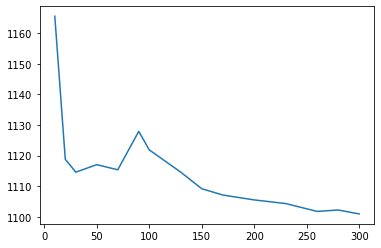

In [ ]:
para=[10,20,30,50,70,90,100,130,150,170,200,230,260,280,300]
rmse_arr_para=[]
for i in para:
    RFRg = RandomForestRegressor(n_estimators = i, random_state = 0)
    RFRg.fit(X_train, y_train)
    rmse_arr_para.append(np.sqrt(mean_squared_error(y_test,RFRg.predict(X_test))))
plt.plot(para,rmse_arr_para)

RFRg = RandomForestRegressor(n_estimators = 300, random_state = 0)
RFRg.fit(X_train, y_train)

Here we have taken Different number of base learner ranging from 10 to 300 and plotted above graph the RMSE value of prediction errror while fitting randomforest regression with varying base learner and it is clear from the graph that Random forest regressor model RMSE first decrease drastically in base learner range 10-50 and there is lay off after that and we have got minimum RMSE by training 300 base learner tree  for the training data .

#Model Selection
Below we are calculating the RMSE value of our above trained model i.e. Linear regression , Ridge Regression ,Random forest regression . Our aim is to find the model which have minimum prediction error i.e. minimum RMSE value of all the models

Test Root mean squared error for linear regression= 1403.5216503559805
Test Root mean squared error for ridge regression= 1425.3640831794412
Test Root mean squared error for Random Forest regression= 1100.9134699200797
Test R2-score for linear regression= 0.861187471675618
Test R2-score for ridge regression= 0.8568332869896798
Test R2-score for Random Forest regression= 0.9145923440304561


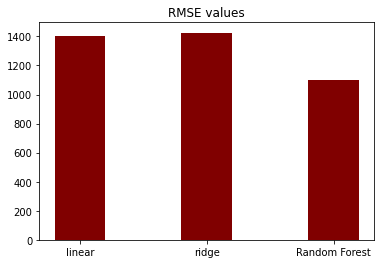

In [ ]:
print("Test Root mean squared error for linear regression=",np.sqrt(mean_squared_error(y_test,regressor_linear.predict(X_test))))
print("Test Root mean squared error for ridge regression=",np.sqrt(mean_squared_error(y_test,ridge_regressor.predict(X_test))))
print("Test Root mean squared error for Random Forest regression=",np.sqrt(mean_squared_error(y_test,RFRg.predict(X_test))))
print("Test R2-score for linear regression=",r2_score(y_test,regressor_linear.predict(X_test)))
print("Test R2-score for ridge regression=",r2_score(y_test,ridge_regressor.predict(X_test)))
print("Test R2-score for Random Forest regression=",r2_score(y_test,RFRg.predict(X_test)))
plt.bar(['linear','ridge','Random Forest'],[np.sqrt(mean_squared_error(y_test,regressor_linear.predict(X_test))),np.sqrt(mean_squared_error(y_test,ridge_regressor.predict(X_test))),np.sqrt(mean_squared_error(y_test,RFRg.predict(X_test)))] , color ='maroon',width = 0.4)
plt.title("RMSE values")
plt.show()



From the above graph it is clear that RMSE value of random forest model is smallest compared to other two model namely linear regression model and ridge regression model . 
So , Now we consider further Randomforest model for further prediction part of the Car Price of the Toyota Corola car based on the given input feature 

## Illustrating the Prediction of our model i.e. Prediction of car price for given feature of car 

In [ ]:
input_para=[]
for k in X_train.columns:
    s=input("Input "+k+" ")
    input_para.append(int(s))
print(input_para)
RFRg.predict([input_para])


# ---------------------------------------------------------THE END ----------------------------------------------------------------------